# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os
from FACET.Facet import Facet
from loguru import logger
import sys

os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))

bids_path = "F:\EEG Datasets\openneuro\FMRIWITHMOTION"
export_bids_path = bids_path

# configure logger
logger.remove()
logger.add(sys.stderr, level="INFO")
logger.add("Facet.log", level="DEBUG")

window_size = 25
upsampling_factor = 1
relative_trigger_position = -6
relative_window_position = -0.5
moosmann_motion_threshold = 0.8
event_id_description_pairs={'trigger':1}
regex_trigger_annotation_filter = r'\bResponse\b' # Annotations with the description 'trigger' are considered as triggers
unwanted_bad_channels = ['EKG', 'EMG', 'EOG', 'ECG'] # Channels with these names are considered as bad channels and not considered in the processing
evaluation_measures=["SNR", "RMS", "RMS2", "MEDIAN"]

f = Facet()


## Second Step import EEG Data

In [2]:
f.import_from_bids(bids_path=bids_path,upsampling_factor=upsampling_factor,rel_trig_pos=relative_trigger_position, bads=['EKG', 'EMG', 'EOG', 'ECG'], subject="xp101", session=None,task="eegfmriNF")
eeg = f.get_EEG()


## Third Step Preprocessing

In [3]:
f.pre_processing()


2024-03-07 13:44:05.103 | INFO     | FACET.Frameworks.Correction:upsample:380 - Upsampling Data


## Fourth Step find triggers

In [4]:

f.find_triggers(regex_trigger_annotation_filter) # Using Niazys data
eeg = f.get_EEG()


2024-03-07 13:44:05.810 | INFO     | FACET.Facet:find_triggers:28 - finding triggers
2024-03-07 13:44:06.808 | INFO     | FACET.Facet:find_triggers:31 - Found 210 triggers


## Fourth step apply AAS

In [5]:
f.apply_AAS()

2024-03-07 13:44:06.818 | INFO     | FACET.Facet:apply_AAS:35 - Applying AAS with method numpy


## Fifth step Remove Artifacts

In [6]:
f.remove_artifacts( )
eeg = f.get_EEG()



## Sixth step Post-Processing

In [7]:
f.post_processing()

2024-03-07 13:44:33.451 | INFO     | FACET.Frameworks.Correction:downsample:369 - Downsampling Data


## Seventh display the processed eeg data

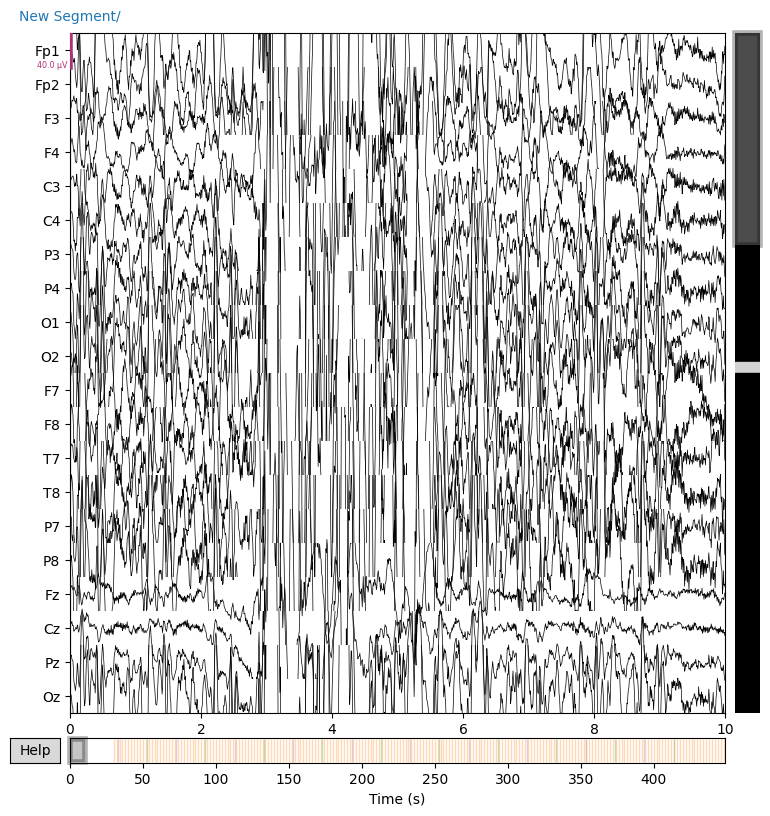

In [8]:
f.plot_EEG(title="after lowpass")

## Eighth Evaluate Results and compare with other Methods

2024-03-07 13:44:40.881 | INFO     | FACET.Facet:find_triggers:28 - finding triggers
2024-03-07 13:44:42.124 | INFO     | FACET.Facet:find_triggers:31 - Found 210 triggers
2024-03-07 13:44:42.531 | INFO     | FACET.Frameworks.Evaluation:add_to_evaluate:31 - ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']
2024-03-07 13:44:55.592 | INFO     | FACET.Frameworks.Correction:upsample:380 - Upsampling Data
2024-03-07 13:44:59.592 | INFO     | FACET.Facet:find_triggers:28 - finding triggers
2024-03-07 13:45:01.098 | INFO     | FACET.Facet:find_triggers:31 - Found 210 triggers
2024-03-07 13:45:01.099 | INFO     | FACET.Facet:appl

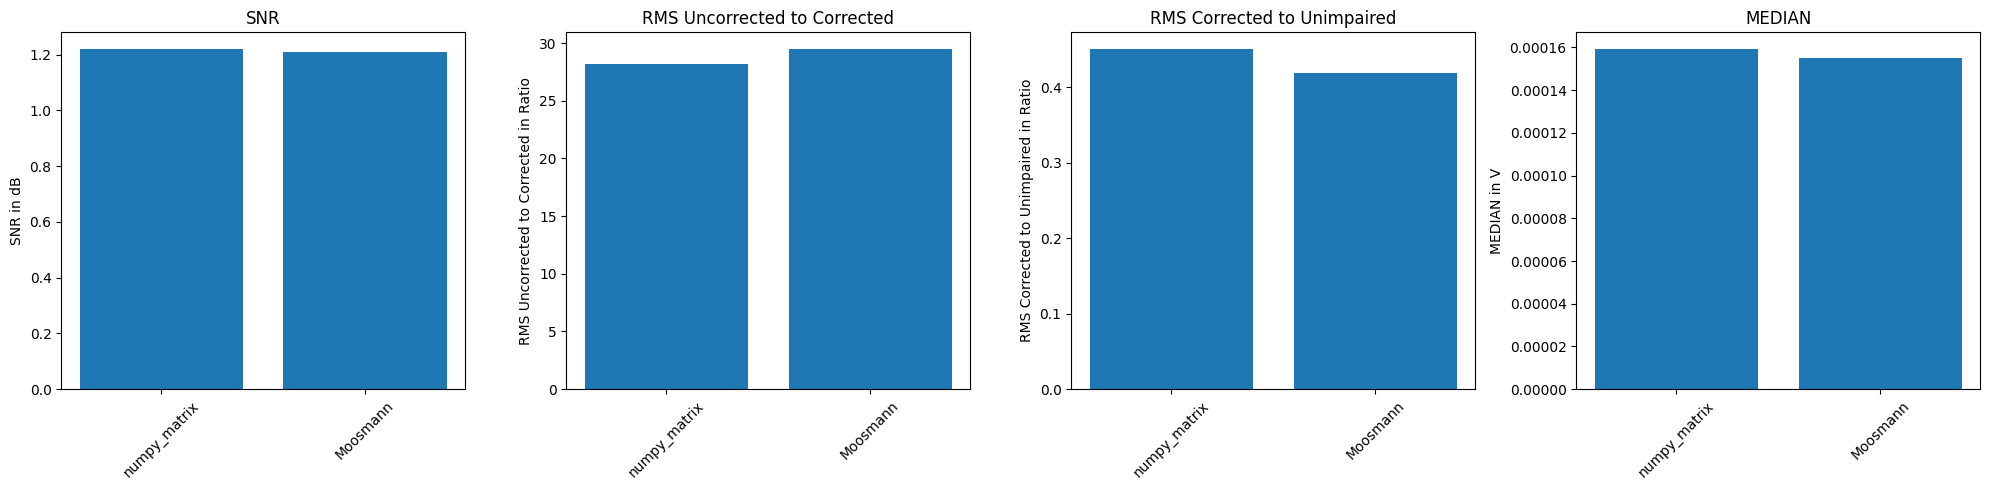

2024-03-07 13:45:48.362 | INFO     | __main__:<module>:19 - [{'Measure': 'SNR', 'Values': [1.2186208816456259, 1.2093969306429955], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [28.19922645795553, 29.453471323697283], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [0.45006302578812507, 0.41856472361674296], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [0.0001591382178252465, 0.0001550168726119249], 'Unit': 'V'}]
2024-03-07 13:46:15.985 | INFO     | FACET.Frameworks.Analytics:export_as_bids:71 - Exporting Channels: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']


ValueError: The provided raw data contains annotations, but "event_id" does not contain entries for all annotation descriptions. The following entries are missing: New Segment/, Response/R128, Stimulus/S  2, Stimulus/S 99

In [9]:
f.find_triggers(regex_trigger_annotation_filter) 
eeg_python = f.get_eeg()
f.add_to_evaluate(eeg_python, name="numpy_matrix") # Matrix will result in >1.0 RMS2 because of python mne inaccuracies

#moosmann
f.import_from_bids(bids_path=bids_path,rel_trig_pos=relative_trigger_position,upsampling_factor=upsampling_factor, bads=unwanted_bad_channels, subject="xp101", session=None,task="eegfmriNF")
f.pre_processing()
f.find_triggers(regex_trigger_annotation_filter)
f.apply_Moosmann(file_path="headmotiondata_209s.tsv", threshold=moosmann_motion_threshold)
f.remove_artifacts()
f.downsample()
f.lowpass(40)
f.find_triggers(regex_trigger_annotation_filter)
f.add_to_evaluate(f.get_eeg(), name="Moosmann")



results = f.evaluate(plot=True,measures=["SNR", "RMS", "RMS2", "MEDIAN"])
logger.info(results)

f.export_as_bids(event_id=event_id_description_pairs, bids_path=export_bids_path)

